Uber Fare Prediction — Linear & Random Forest Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Load dataset
df = pd.read_csv('uber.csv')
print('Dataset Loaded ')
print(df.head())

Dataset Loaded 
   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647              

In [3]:
# Data Preprocessing
df = df.drop(columns=['Unnamed: 0', 'key'], errors='ignore')
df = df.dropna()
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year
df = df.drop(columns=['pickup_datetime'])
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 100)]
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 7)]
print('Data cleaned')

Data cleaned


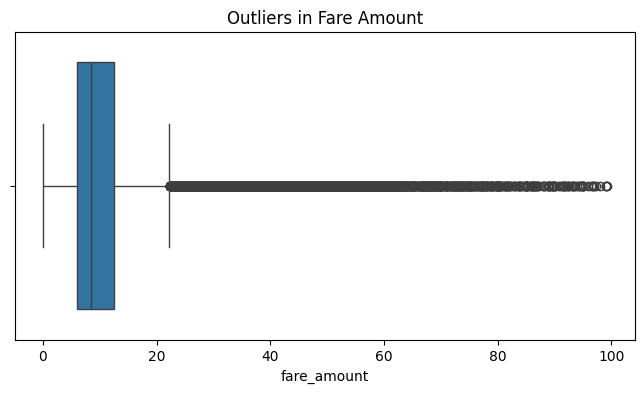

In [4]:
# Outlier Detection
plt.figure(figsize=(8,4))
sns.boxplot(x=df['fare_amount'])
plt.title('Outliers in Fare Amount')
plt.show()

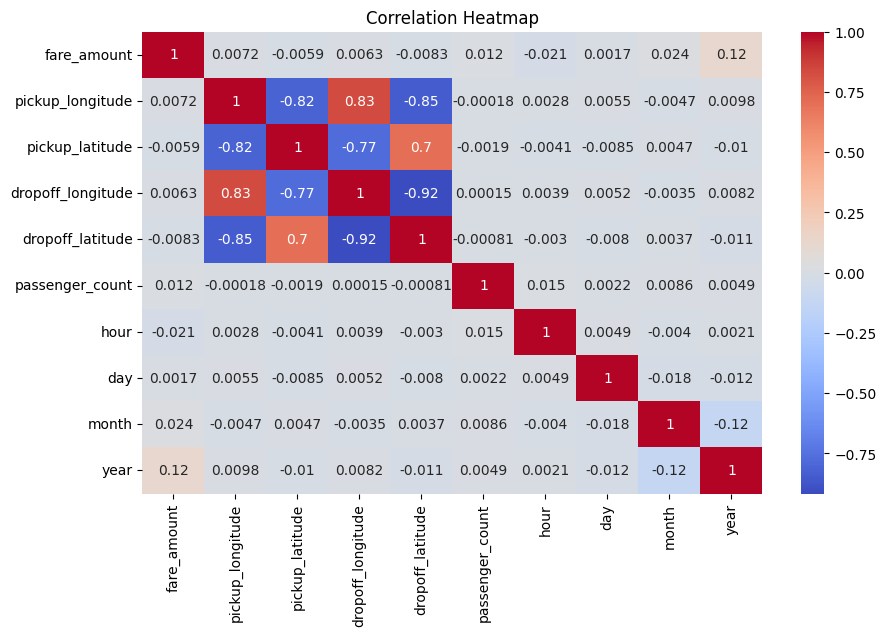

In [5]:
# Correlation Analysis
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [6]:
# Feature Selection and Train-Test Split
X = df.drop(columns=['fare_amount'])
y = df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Linear Regression Done ')

Linear Regression Done 


In [8]:
# Random Forest Regression (optimized)
rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest Done ')

Random Forest Done 


In [9]:
# Model Evaluation
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R2 Score': [r2_lr, r2_rf],
    'RMSE': [rmse_lr, rmse_rf]
})
print(results)

               Model  R2 Score      RMSE
0  Linear Regression  0.015964  9.379307
1      Random Forest  0.817804  4.035849


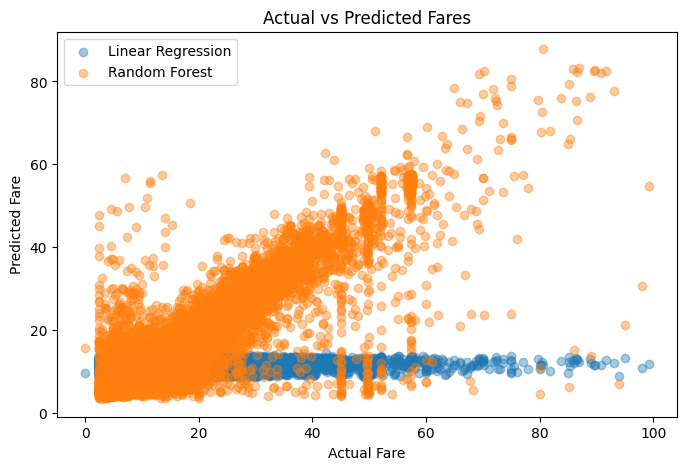

In [10]:
# Visualization of Predictions
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lr, alpha=0.4, label='Linear Regression')
plt.scatter(y_test, y_pred_rf, alpha=0.4, label='Random Forest')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.legend()
plt.title('Actual vs Predicted Fares')
plt.show()